<a href="https://colab.research.google.com/github/Artenida/computer_vision_lessons/blob/main/Basic_Image_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading a grayscale image

In [14]:
!ls "/content/drive/MyDrive/Colab Notebooks/Images"

image1.tif


<ipython-input-13-a2b4ece95129>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)
<ipython-input-13-a2b4ece95129>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


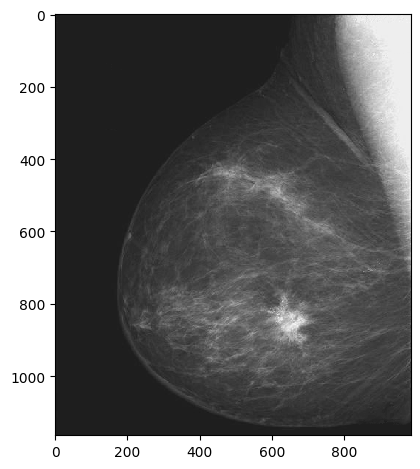

In [13]:
import skimage as sk
from skimage.io import imread
I = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/Images/image1.tif')
sk.io.imshow(I)
sk.io.show()

Check image size:

In [15]:
I.shape

(1164, 984)

Access to origin pixel (top-left, DARK REGION)

In [16]:
I[0,0] #first row, first column

np.uint8(38)

In [17]:
I[0, 983] #first row, last column

np.uint8(238)

In [18]:
I.dtype

dtype('uint8')

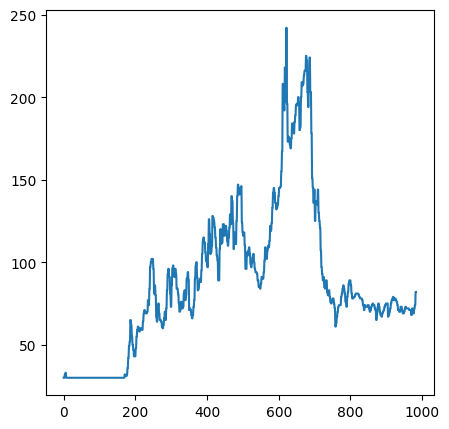

In [22]:
Irow = I[850, :]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

<ipython-input-23-b50b52a8d9db>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)
<ipython-input-23-b50b52a8d9db>:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


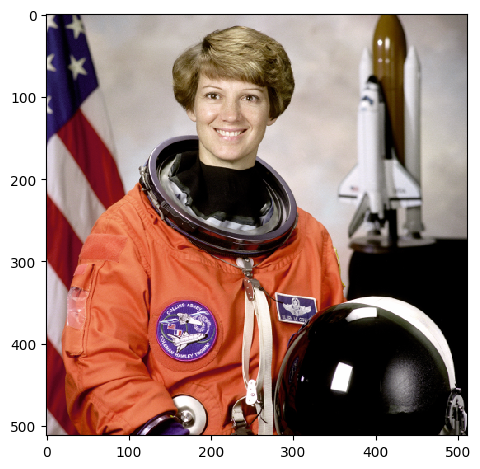

M=512 comulns, N = 512 rows, NC = 3 color channels


In [23]:
import skimage as sk
IC = sk.data.astronaut()
sk.io.imshow(IC)
sk.io.show()
print('M={} comulns, N = {} rows, NC = {} color channels'.format(*IC.shape))

In [25]:
IC.shape

(512, 512, 3)

Convert color to grayscale

In [26]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

In [27]:
IG[0,0]

np.float64(0.5834349019607843)

Using colormaps

<ipython-input-38-47f5b30555e3>:13: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


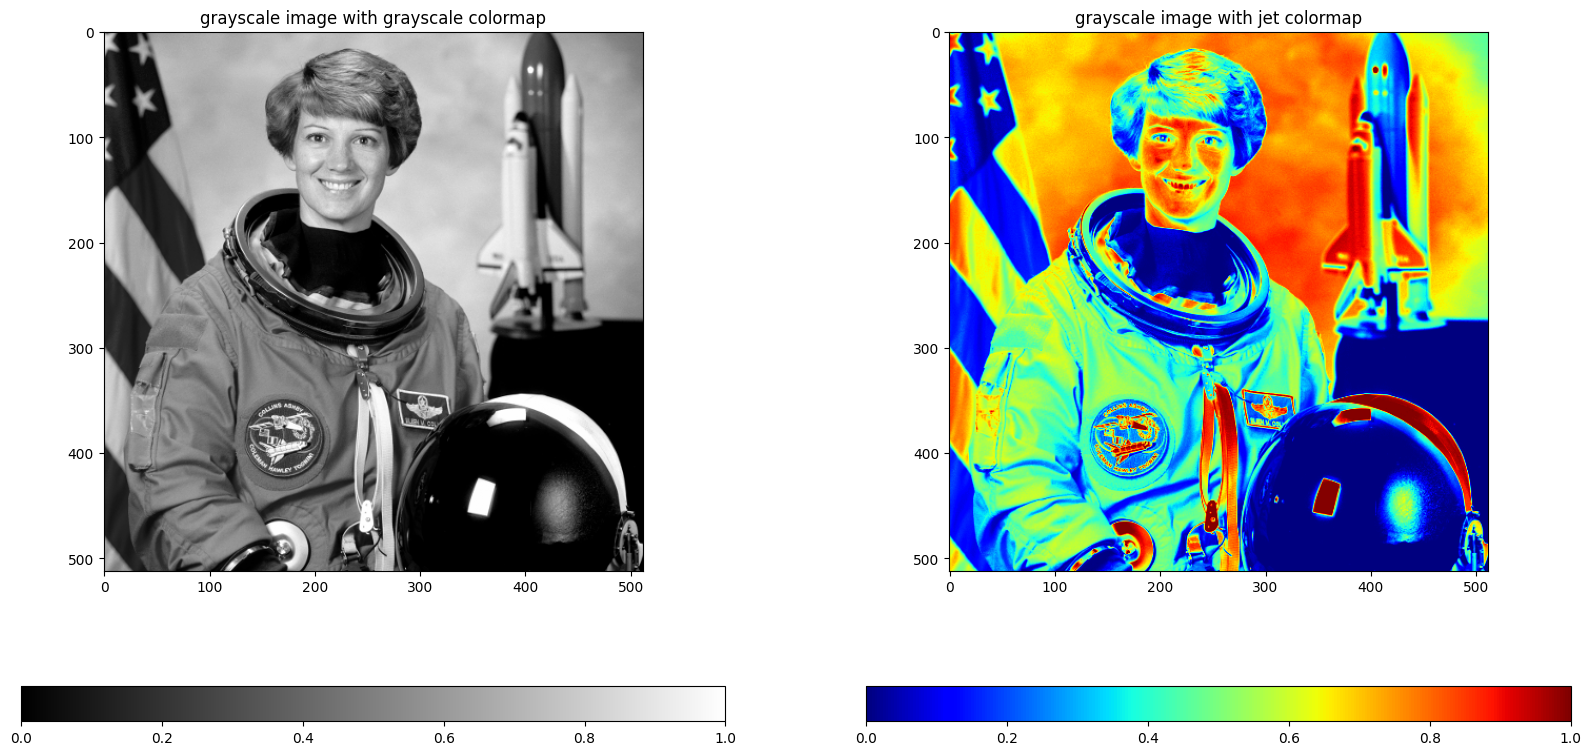

In [38]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(20,10))
ax = axes.ravel() #convert axes to 1d array

im1 = ax[0].imshow(IG, cmap=plt.cm.gray)
ax[0].set_title('grayscale image with grayscale colormap')
fig.colorbar(im1,ax=ax[0],orientation='horizontal')

im2 = ax[1].imshow(IG, cmap=plt.cm.jet)
ax[1].set_title('grayscale image with jet colormap')
fig.colorbar(im2, ax=ax[1], orientation = 'horizontal')

sk.io.show()

Convert image to different formats

In [39]:
import numpy as np

from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

np.max(IGB)

np.uint8(255)

Image Histogram

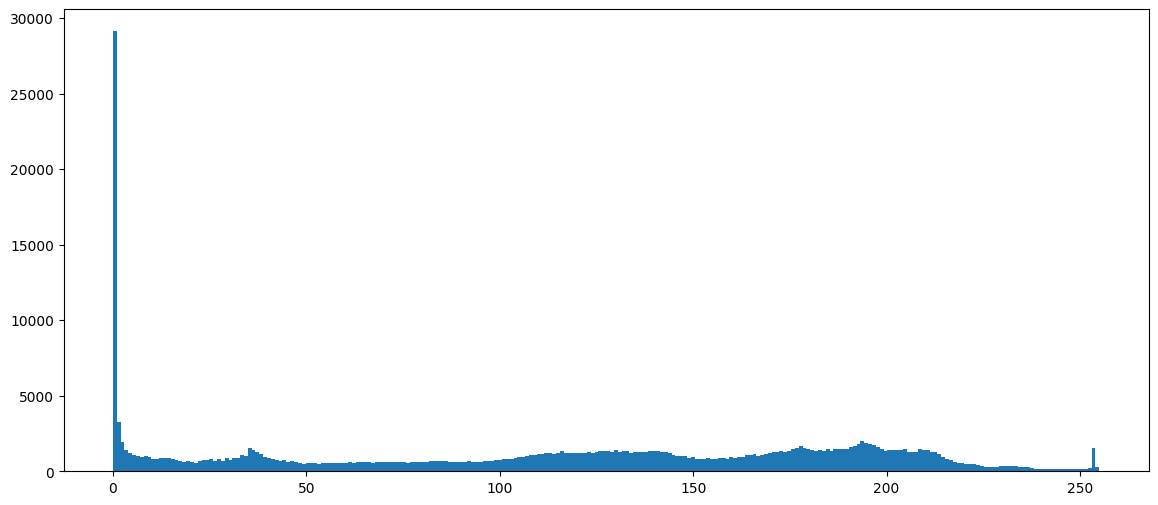

In [40]:
import matplotlib.pyplot as plt
import numpy as np

v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize = (14,6))
plt.hist(v, bins = 256, density = False) #density = False, raw count of pixels
plt.show()

In [41]:
IGB.shape[0]*IGB.shape[1] #Total nr of pixels in the image

262144

In [43]:
v[v==0].shape[0] # Nr of pixels with value zero

29129

In [46]:
p0 = v[v==0].shape[0]/(IGB.shape[0]*IGB.shape[1]) # Probability of grapyscale level zero
print(p0)

0.11111831665039062


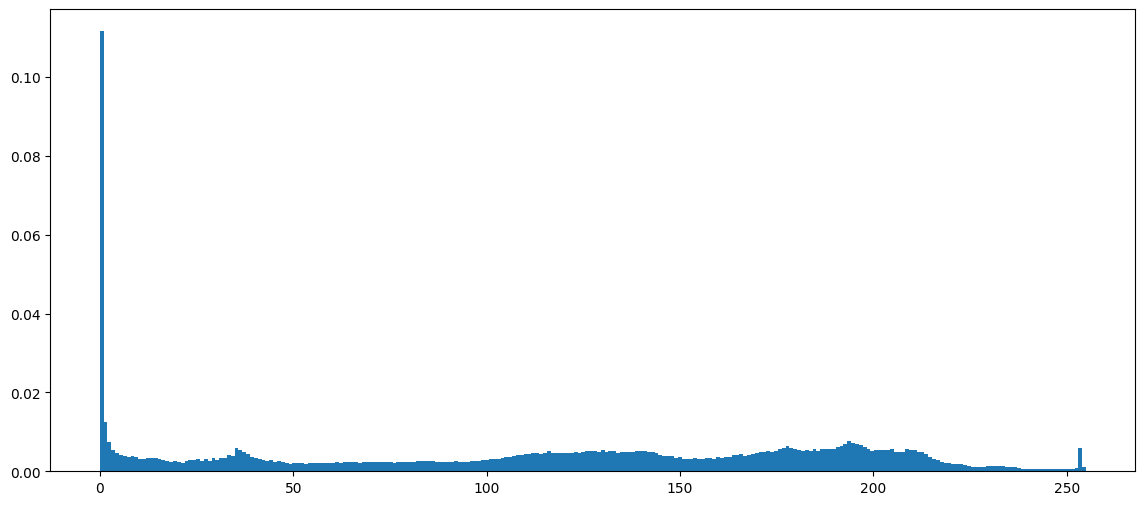

In [47]:
fig = plt.figure(figsize=(14,6))
plt.hist(v, bins = 256, density=True) #density = True, shows the probability density
plt.show()

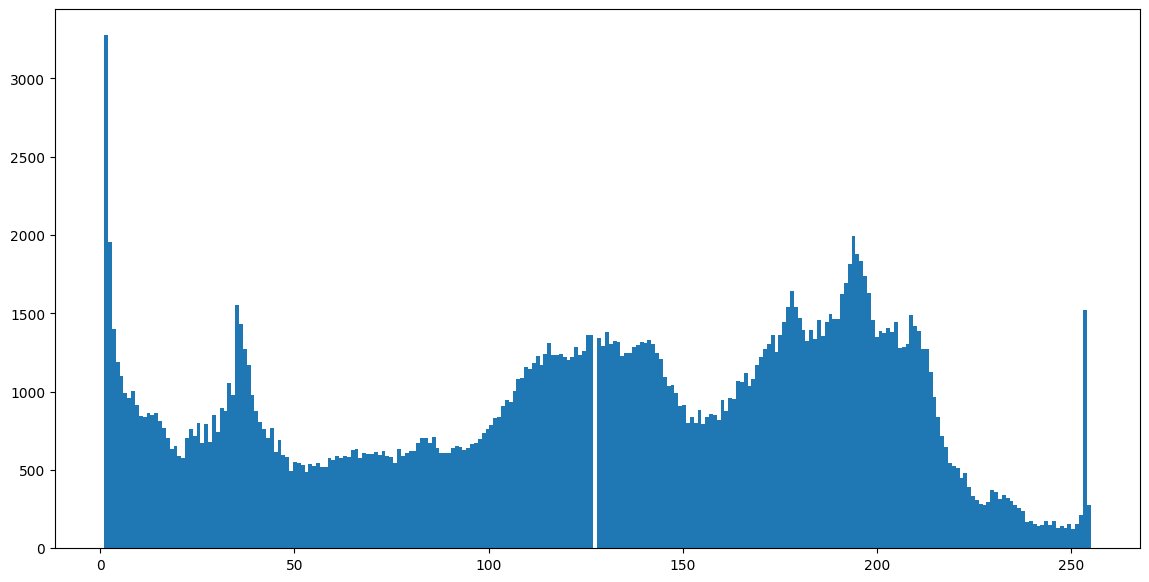

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#keep only pixels with a value higher than zero
v=v[v>0]
fig = plt.figure(figsize=(14,7))
plt.hist(v, bins=256, density=False)
plt.show()

Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

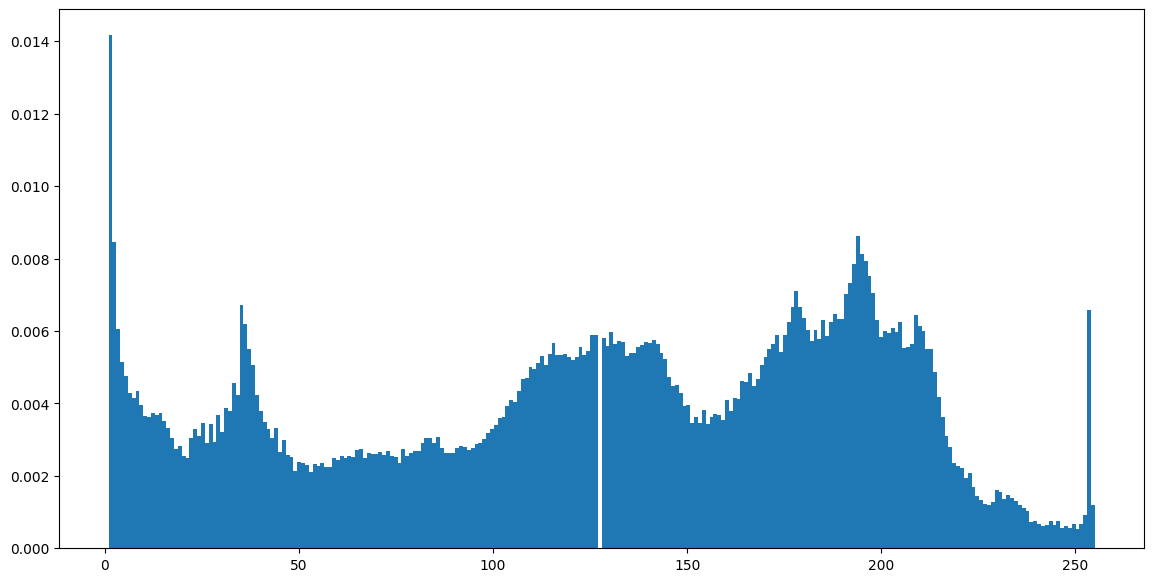

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#keep only pixels with a value higher than zero
v=v[v>0]
fig = plt.figure(figsize=(14,7))
plt.hist(v, bins=256, density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

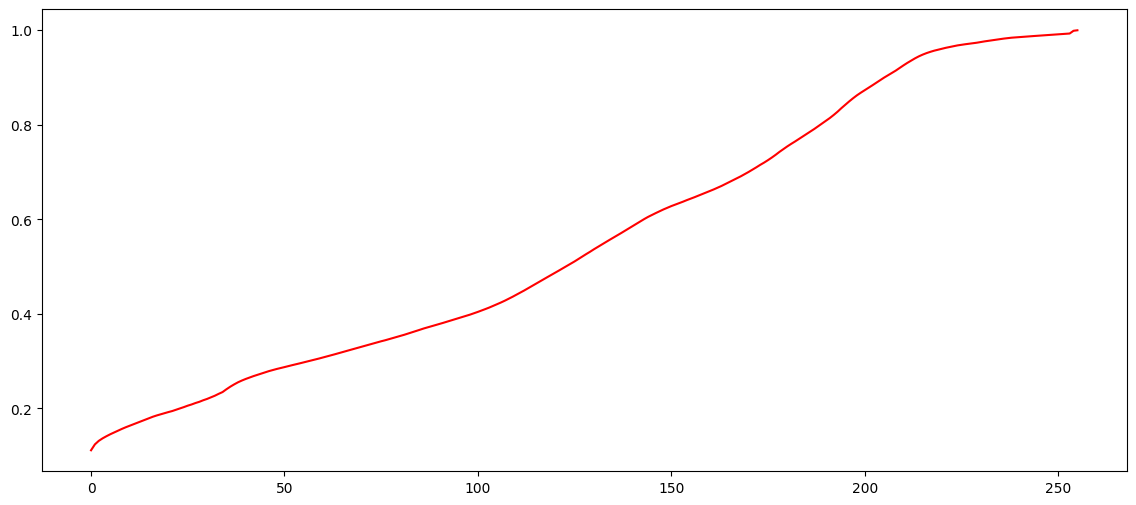

In [50]:
from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize = (14,6))
plt.plot(bins, img_cdf, 'r') # bins - pixel intesity value (x-axis), img_cdf - cdf (y-axis), r - red color
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5):
It tells the gray level where, 50% of the pixels are darker and 50% are brighter



In [51]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1], 1) # v becomes a 1D array of all pixel values
np.median

np.float64(123.0)